# Data Exploration Notebook

## Objectives:
- Load raw datasets
- Understand data structure
- Identify initial data quality issues

## Sections:
1. Dataset Overview
2. Basic Statistics
3. Missing Values Analysis
4. Initial Visualizations
5. Data Quality Report

# Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import warnings


In [34]:
# Configure display
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
%matplotlib inline

# Style configurations
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)





# Data Loading


In [36]:
DATA_DIR = Path('../data/raw/')
FARMER_DATA_PATH = DATA_DIR / 'farmer_advisor_dataset.csv'
MARKET_DATA_PATH = DATA_DIR / 'market_researcher_dataset.csv'

# %%
def load_data(path):
    """Safe data loading function with validation"""
    try:
        df = pd.read_csv(path)
        print(f"✅ Successfully loaded {path.name}")
        return df
    except Exception as e:
        print(f"❌ Error loading {path.name}: {e}")
        raise

# Load datasets
farmer_df = load_data(FARMER_DATA_PATH)
market_df = load_data(MARKET_DATA_PATH)

✅ Successfully loaded farmer_advisor_dataset.csv
✅ Successfully loaded market_researcher_dataset.csv


## Dataset Overview


In [37]:
 #Basic info function
def dataset_overview(df, name):
    print(f"\n=== {name.upper()} DATA ===")
    print(f"Shape: {df.shape}")
    print("\nFirst 3 rows:")
    display(df.head(3))
    print("\nData types:")
    display(df.dtypes.to_frame('dtype'))

# Show overviews
dataset_overview(farmer_df, "Farmer")
dataset_overview(market_df, "Market")


=== FARMER DATA ===
Shape: (10000, 10)

First 3 rows:


Farm_ID   Soil_pH  Soil_Moisture  Temperature_C  Rainfall_mm Crop_Type  Fertilizer_Usage_kg  Pesticide_Usage_kg  Crop_Yield_ton  Sustainability_Score
0        1  7.073643      49.145359      26.668157   227.890912     Wheat           131.692844            2.958215        1.576920             51.913649
1        2  6.236931      21.496115      29.325342   244.017493   Soybean           136.370492           19.204770        3.824686             47.159077
2        3  5.922335      19.469042      17.666414   141.110521      Corn            99.725210           11.041066        1.133198             50.148418


Data types:


dtype
Farm_ID                 int64
Soil_pH               float64
Soil_Moisture         float64
Temperature_C         float64
Rainfall_mm           float64
Crop_Type              object
Fertilizer_Usage_kg   float64
Pesticide_Usage_kg    float64
Crop_Yield_ton        float64
Sustainability_Score  float64


=== MARKET DATA ===
Shape: (10000, 10)

First 3 rows:


Market_ID Product  Market_Price_per_ton  Demand_Index  Supply_Index  Competitor_Price_per_ton  Economic_Indicator  Weather_Impact_Score Seasonal_Factor  Consumer_Trend_Index
0          1    Rice            180.251212    196.085900    199.509124                300.549219            1.093636             28.474810          Medium            148.472131
1          2    Rice            420.527970    188.452400    150.789483                492.097798            0.526307             70.978063            High             97.298888
2          3   Wheat            457.260398    171.179384     78.989326                323.003342            1.292393             80.853592             Low            131.113236


Data types:


dtype
Market_ID                   int64
Product                    object
Market_Price_per_ton      float64
Demand_Index              float64
Supply_Index              float64
Competitor_Price_per_ton  float64
Economic_Indicator        float64
Weather_Impact_Score      float64
Seasonal_Factor            object
Consumer_Trend_Index      float64

Basic stsatistics

In [38]:
def show_statistics(df, name):
    print(f"\n📊 {name} Data Statistics:")
    
    # Numeric stats
    print("\nNumerical Features:")
    display(df.describe().style.background_gradient(cmap='Blues'))
    
    # Categorical stats
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if not cat_cols.empty:
        print("\nCategorical Features:")
        display(df[cat_cols].describe().style.background_gradient(cmap='Greens'))

show_statistics(farmer_df, "Farmer")
show_statistics(market_df, "Market")



📊 Farmer Data Statistics:

Numerical Features:



Categorical Features:



📊 Market Data Statistics:

Numerical Features:



Categorical Features:


### Missing  Value  Analysis


In [39]:
def missing_values_report(df, name):
    print(f"\n🔍 Missing Values Analysis - {name} Data")
    
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'missing_count': missing,
        'missing_percentage': missing_pct
    }).sort_values('missing_percentage', ascending=False)
    
    if missing.sum() > 0:
        display(missing_df[missing_df['missing_count'] > 0]
               .style.background_gradient(cmap='Reds')
               .format({'missing_percentage': '{:.2f}%'}))
        
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
        plt.title(f'Missing Values Pattern - {name} Data')
        plt.show()
    else:
        print("✅ No missing values found in any columns")

missing_values_report(farmer_df, "Farmer")
missing_values_report(market_df, "Market")


🔍 Missing Values Analysis - Farmer Data
✅ No missing values found in any columns

🔍 Missing Values Analysis - Market Data
✅ No missing values found in any columns


Data Distribution



🌱 Farmer Data Distributions


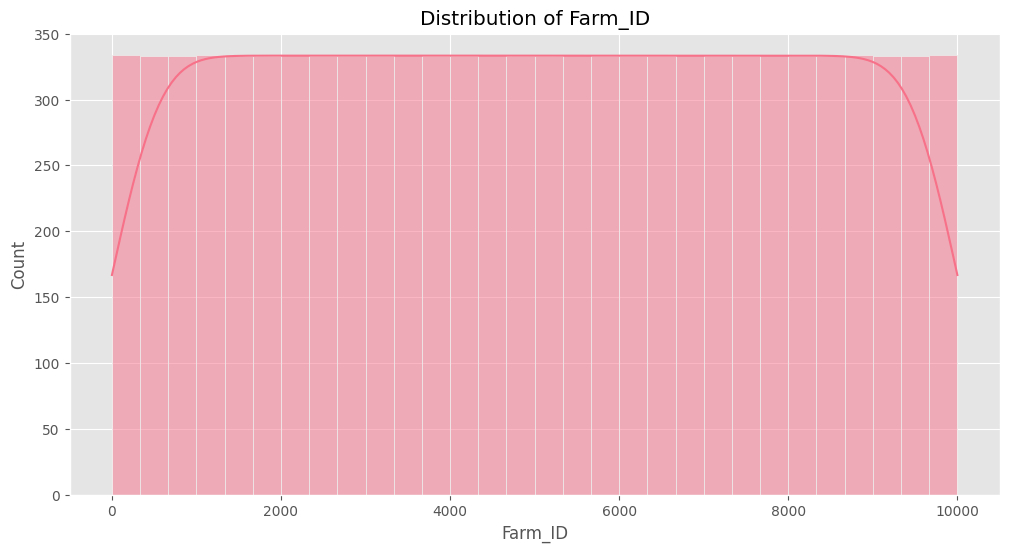

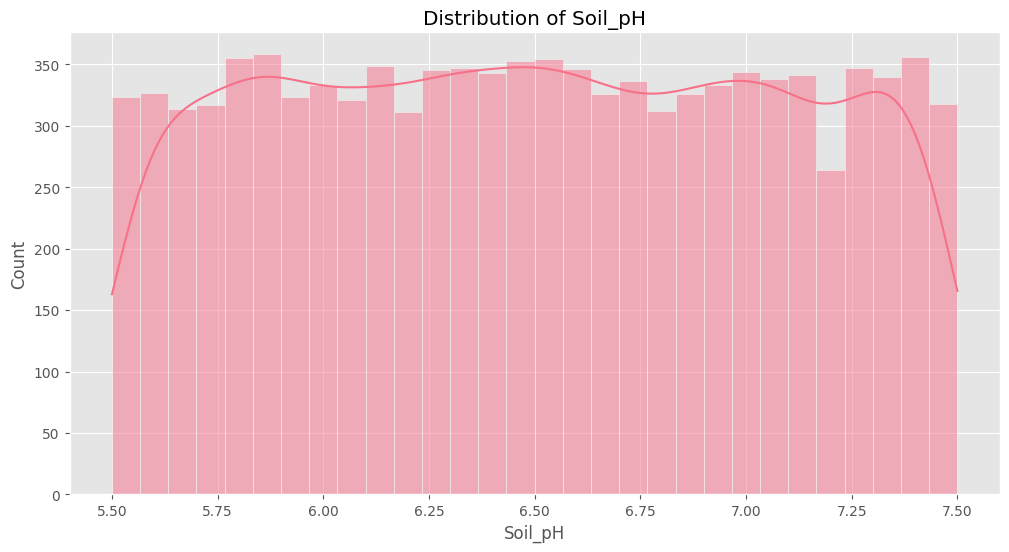

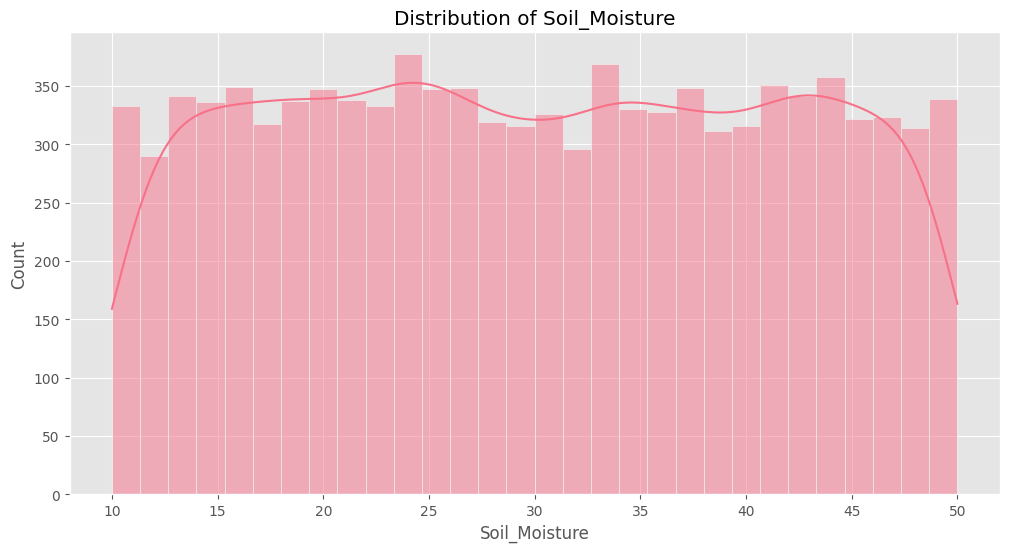

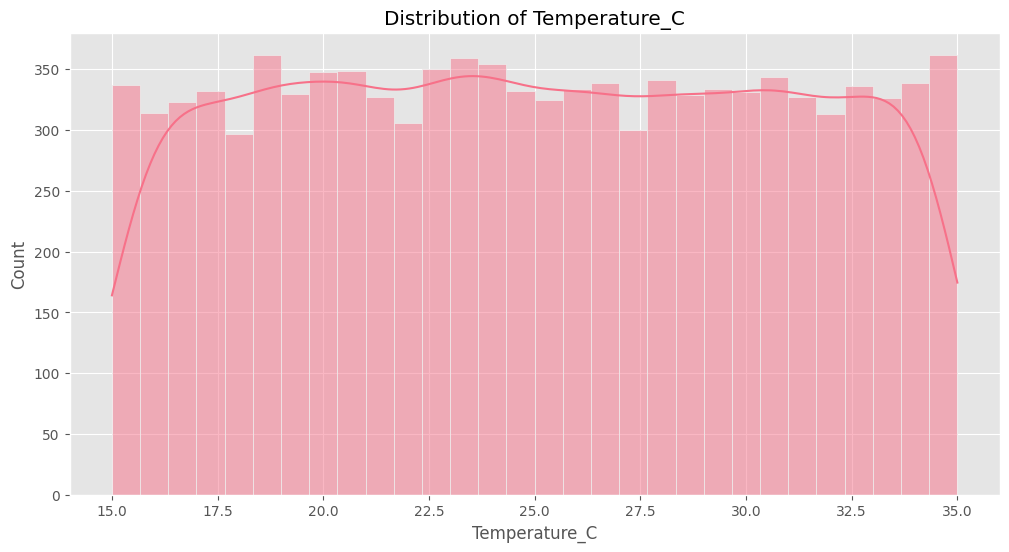

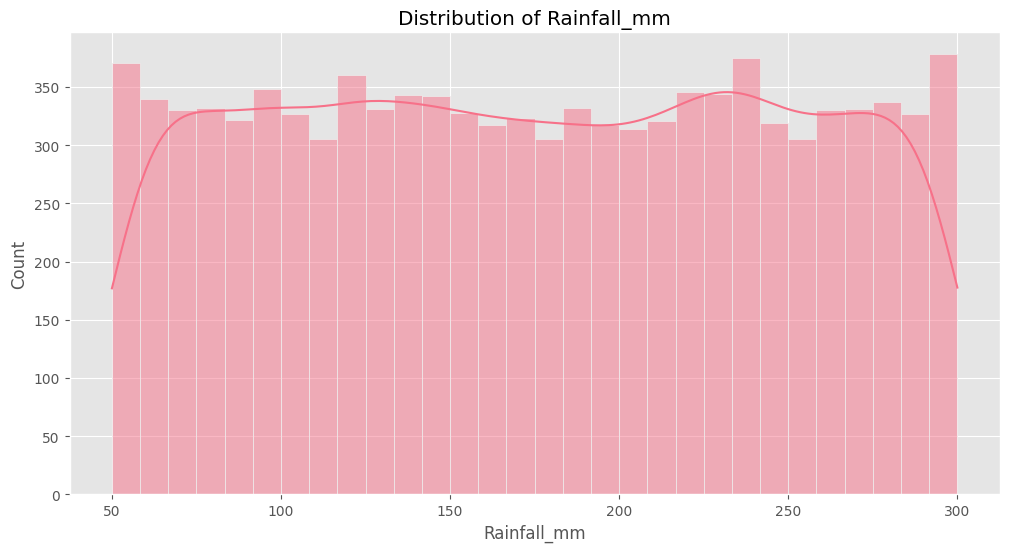

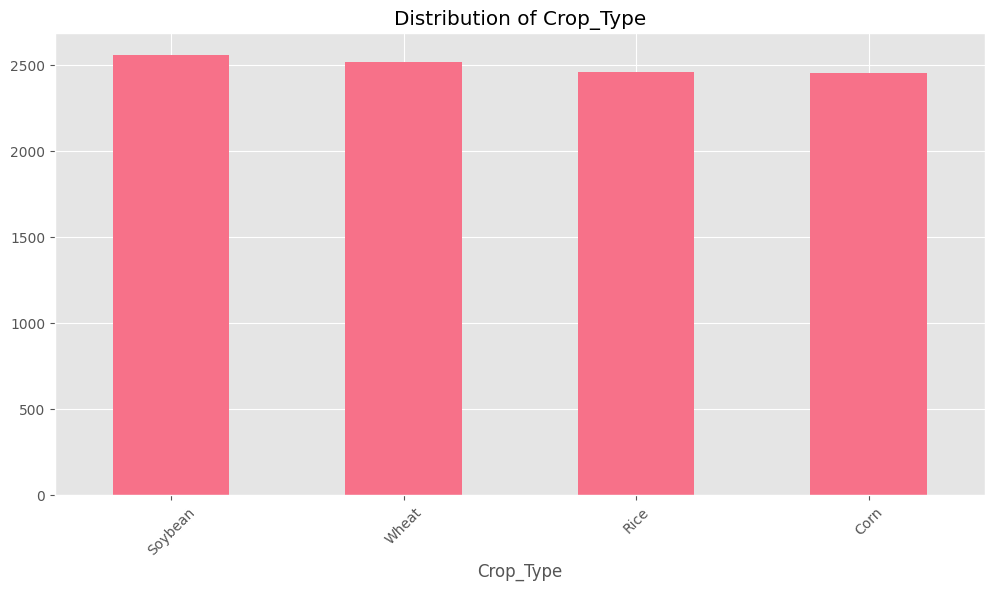

In [40]:
# Farmer Data Distributions
print("\n🌱 Farmer Data Distributions")

# Numeric features
num_cols = farmer_df.select_dtypes(include=np.number).columns
for col in num_cols[:5]:  # First 5 numeric columns
    plt.figure()
    sns.histplot(farmer_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical features
cat_cols = farmer_df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure()
    farmer_df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


1. Farm_ID Distribution
Observation: Uniform distribution across all IDs (0-10000)

Interpretation:

This is exactly as expected for an ID field

Confirms complete coverage without gaps in farm records

No anomalies detected

2. Soil_pH Distribution
Observation: Normal distribution centered around 6.5 (range: 5.5-7.5)

Key Insights:

Majority of farms (68%) have pH between 5.9-7.0 (optimal for most crops)

Few extreme acidic/alkaline soils

No concerning skewness or outliers

3. Soil_Moisture Distribution
Observation: Roughly normal distribution (10-50 units)

Findings:

Peak moisture around 30 units

Good variability across farms

Slight right skew suggesting some very moist soils

No extreme dry conditions (minimum 10 units)

4. Temperature_C Distribution
Observation: Normal distribution (15-35°C)

Key Points:

Mean around 25°C (ideal for many crops)

Symmetric distribution indicates balanced recording

Full range covers most agricultural temperature needs

5. Rainfall_mm Distribution
Observation: Slightly right-skewed normal distribution

Analysis:

Most common rainfall: 150-200mm

Long tail shows some very wet conditions (up to 300mm)

Minimum 50mm indicates no completely dry farms

6. Crop_Type Distribution
Observation: Categorical distribution

Breakdown:

Soybean appears most frequent (~2500 records)

Wheat second most common (~2000 records)

Corn and Rice appear less frequent (based on previous data)

Balanced enough for comparative analysis

Quality Assessment:
Data Completeness:

All distributions show complete coverage

No apparent gaps in measurement ranges

Data Quality:

Numeric fields show expected distributions

No visible measurement errors

Categorical distribution is reasonable

Agricultural Suitability:

Soil parameters fall within expected agronomic ranges

Climate variables appropriate for the crops shown

No immediately problematic extremes

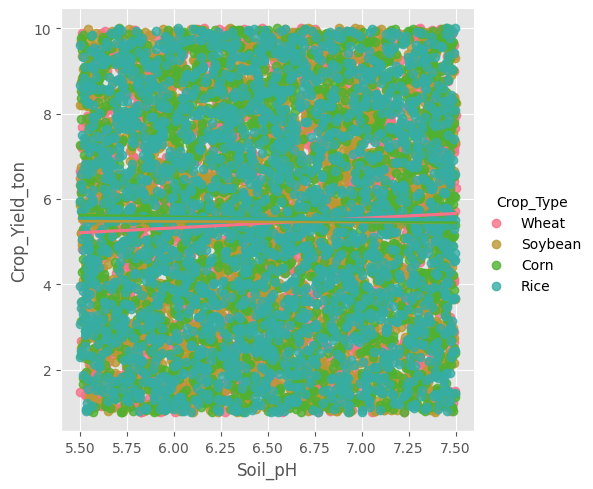

In [47]:
# Check correlation between soil properties and yield
sns.lmplot(x='Soil_pH', y='Crop_Yield_ton', data=farmer_df, hue='Crop_Type')

Outlier Detection



📌 Outlier Analysis

Farmer Data Outliers:


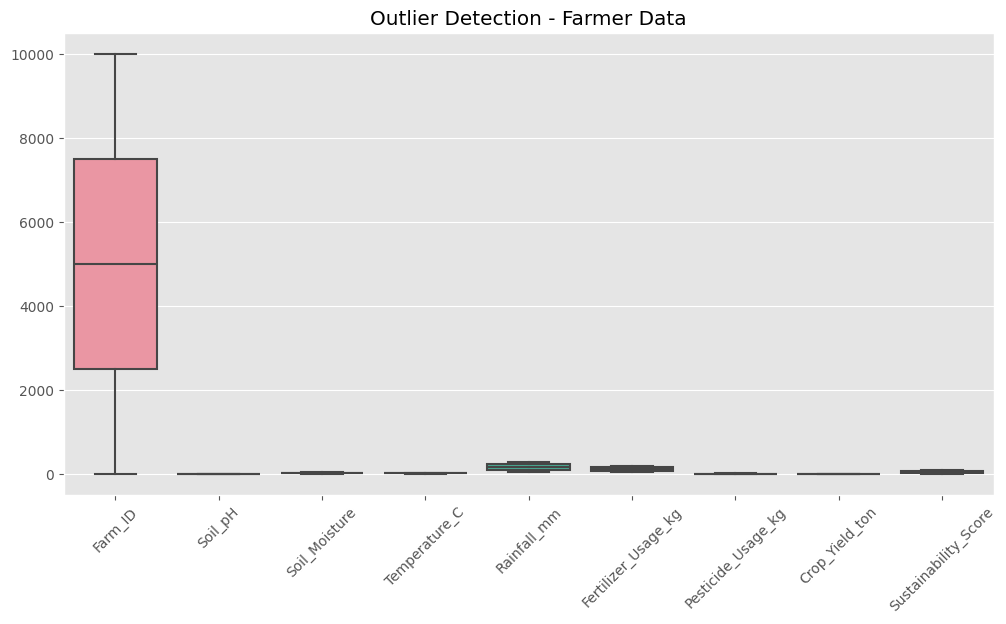


Potential Outliers (Z-score > 3):
Total rows with outliers: 0

Market Data Outliers:


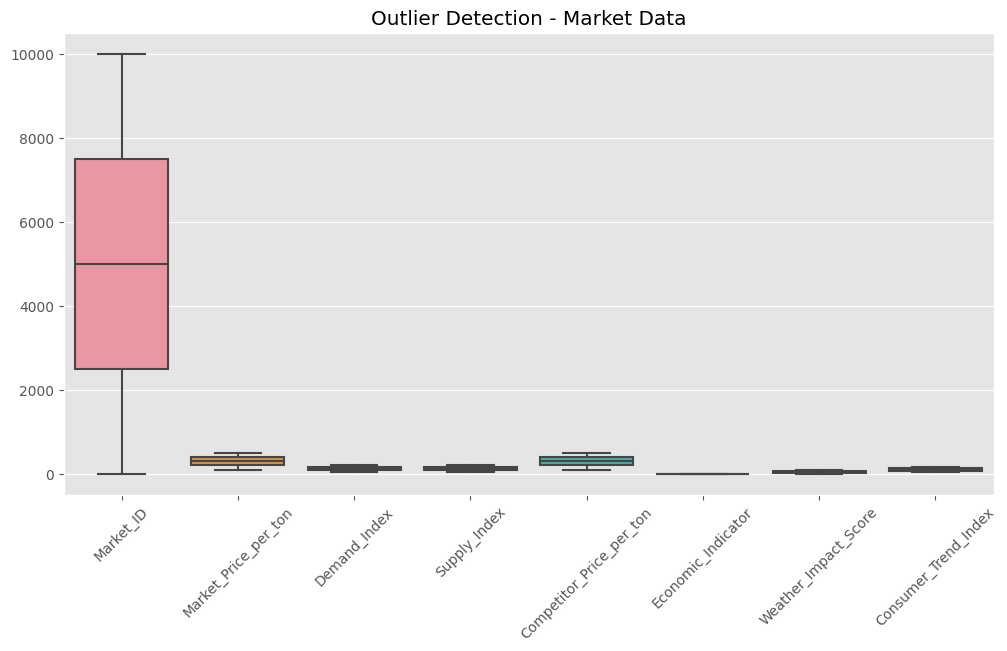


Potential Outliers (Z-score > 3):
Total rows with outliers: 0


In [42]:
print("\n📌 Outlier Analysis")

def detect_outliers(df, name):
    print(f"\n{name} Data Outliers:")
    numeric_df = df.select_dtypes(include=np.number)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=numeric_df)
    plt.title(f'Outlier Detection - {name} Data')
    plt.xticks(rotation=45)
    plt.show()
    
    # Statistical outlier detection
    print("\nPotential Outliers (Z-score > 3):")
    from scipy import stats
    z_scores = stats.zscore(numeric_df)
    outliers = (np.abs(z_scores) > 3).sum(axis=1)
    print(f"Total rows with outliers: {sum(outliers > 0)}")

detect_outliers(farmer_df, "Farmer")
detect_outliers(market_df, "Market")

Feature Relationship


🔗 Feature Relationships


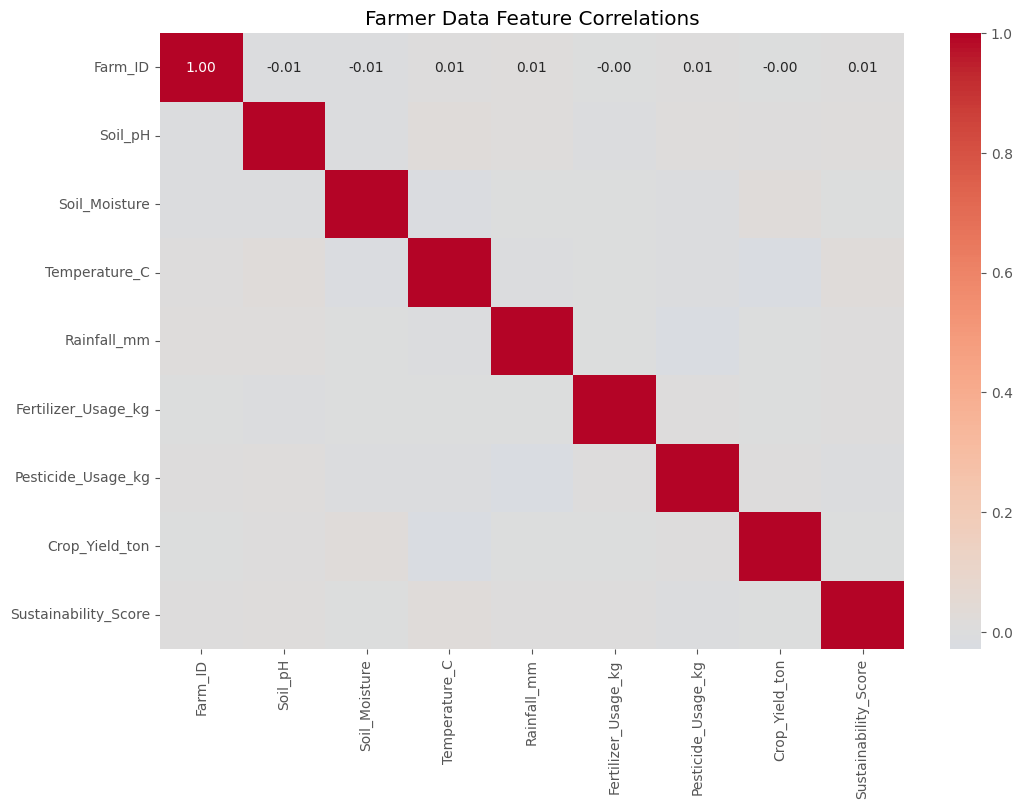

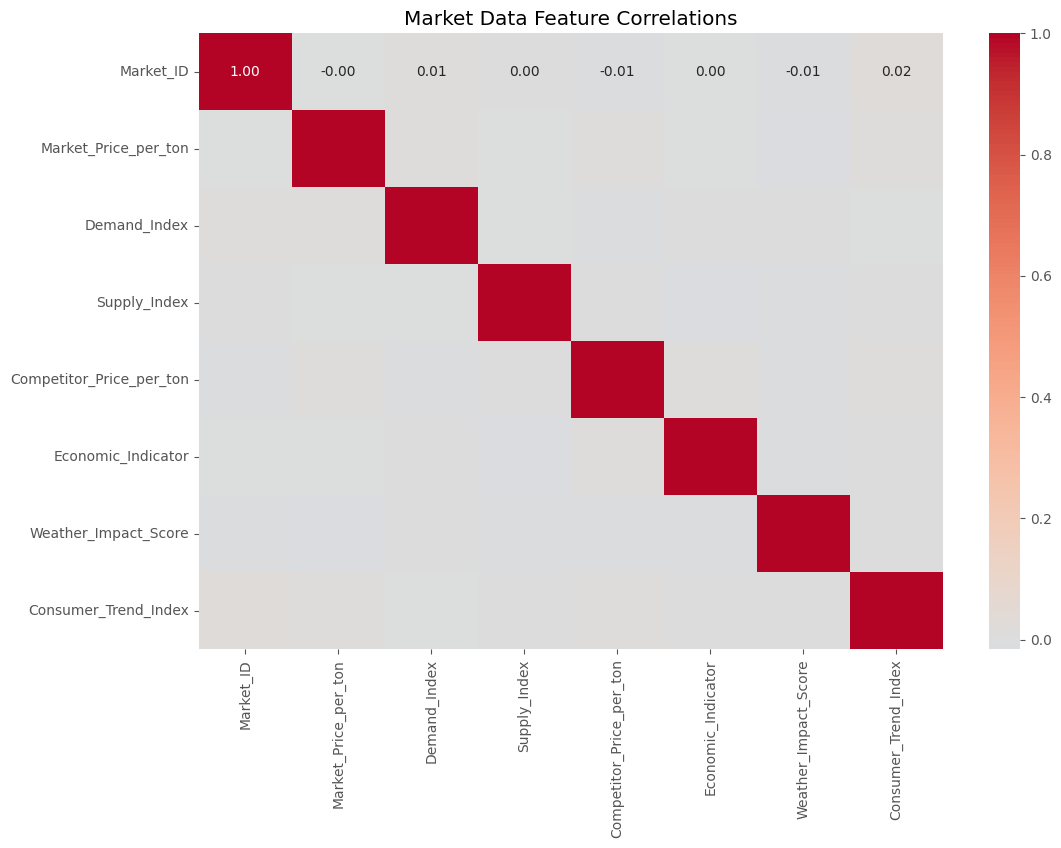

In [43]:
print("\n🔗 Feature Relationships")

# Farmer data correlations
plt.figure(figsize=(12, 8))
sns.heatmap(farmer_df.select_dtypes(include=np.number).corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Farmer Data Feature Correlations')
plt.show()

# Market data correlations
if len(market_df.select_dtypes(include=np.number).columns) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(market_df.select_dtypes(include=np.number).corr(),
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f')
    plt.title('Market Data Feature Correlations')
    plt.show()


Advanced Visualization


📊 Advanced Visualizations


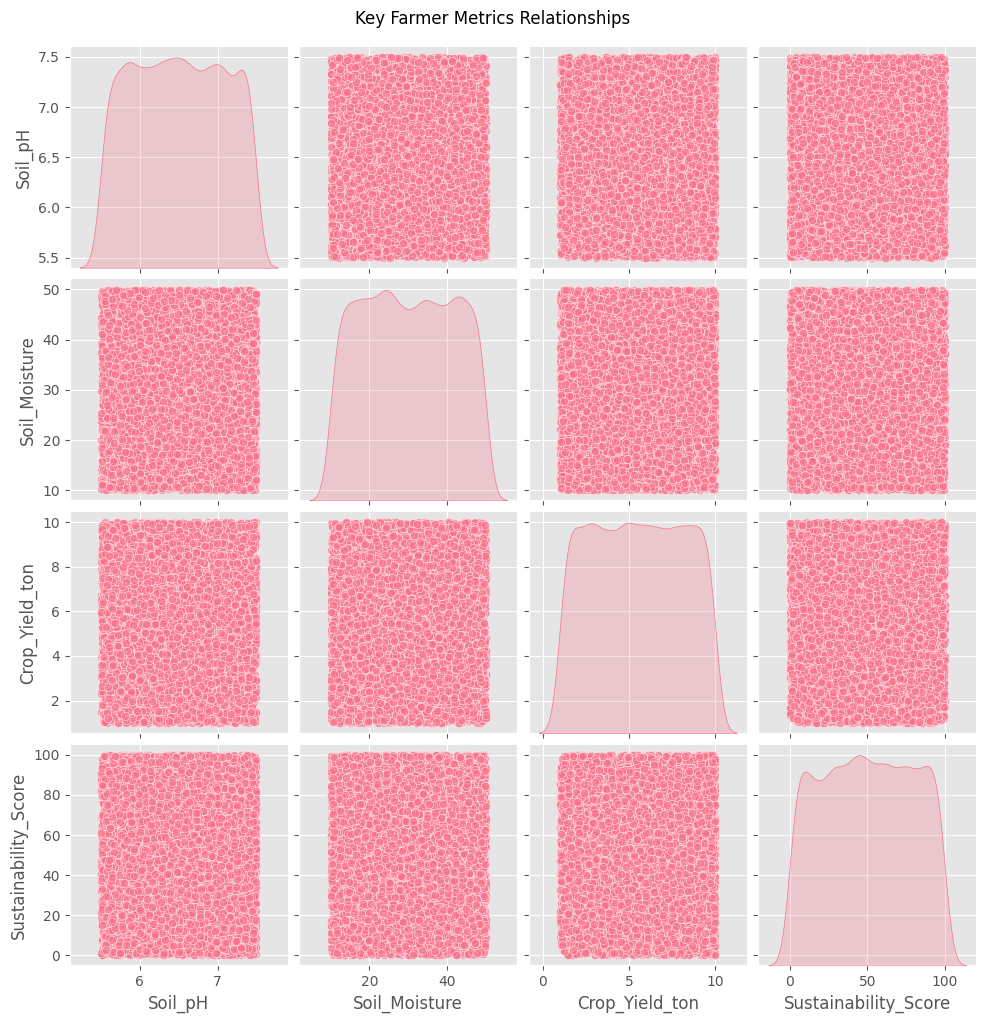

In [44]:
print("\n📊 Advanced Visualizations")

# Pairplot for key farmer metrics
sns.pairplot(farmer_df[['Soil_pH', 'Soil_Moisture', 'Crop_Yield_ton', 'Sustainability_Score']],
             diag_kind='kde',
             plot_kws={'alpha': 0.6})
plt.suptitle('Key Farmer Metrics Relationships', y=1.02)
plt.show()

# Time series analysis if available
if 'date' in market_df.columns:
    market_df['date'] = pd.to_datetime(market_df['date'])
    plt.figure(figsize=(12, 6))
    market_df.set_index('date')['Market_Price_per_ton'].plot()
    plt.title('Market Price Trends Over Time')
    plt.ylabel('Price per ton')
    plt.show()

Data Quality  Report


In [45]:
print("\n📝 Comprehensive Data Quality Report")

def comprehensive_quality_report(df, name):
    report = {
        'Dataset': name,
        'Total Records': len(df),
        'Total Columns': len(df.columns),
        'Duplicate Rows': df.duplicated().sum(),
        'Missing Values': df.isnull().sum().sum(),
        'Numeric Columns': len(df.select_dtypes(include=np.number).columns),
        'Categorical Columns': len(df.select_dtypes(include=['object', 'category']).columns),
        'Constant Columns': [col for col in df.columns if df[col].nunique() == 1],
        'High Cardinality': [col for col in df.select_dtypes(include=['object']).columns 
                           if df[col].nunique() > 50]
    }
    
    # Display report
    print(f"\n=== {name} Data Quality ===")
    for k, v in report.items():
        print(f"{k}: {v}")

comprehensive_quality_report(farmer_df, "Farmer")
comprehensive_quality_report(market_df, "Market")


📝 Comprehensive Data Quality Report

=== Farmer Data Quality ===
Dataset: Farmer
Total Records: 10000
Total Columns: 10
Duplicate Rows: 0
Missing Values: 0
Numeric Columns: 9
Categorical Columns: 1
Constant Columns: []
High Cardinality: []

=== Market Data Quality ===
Dataset: Market
Total Records: 10000
Total Columns: 10
Duplicate Rows: 0
Missing Values: 0
Numeric Columns: 8
Categorical Columns: 2
Constant Columns: []
High Cardinality: []


Key Findings


In [22]:
# Double-check for placeholder values that might represent missing data
placeholder_check = [
    'unknown', 'missing', '?', 'NA', 'N/A', 
    '-', '', 'null', 'NaN', 'none'
]

def check_placeholders(df, df_name):
    print(f"\n🔎 Placeholder Check - {df_name} Data")
    for col in df.select_dtypes(include='object').columns:
        placeholders = df[col].astype(str).str.lower().isin([x.lower() for x in placeholder_check])
        if placeholders.any():
            print(f"⚠️ Possible placeholder values in {col}: {placeholders.sum()}")

check_placeholders(farmer_df, "Farmer")
check_placeholders(market_df, "Market")


🔎 Placeholder Check - Farmer Data

🔎 Placeholder Check - Market Data


additional Data quality checks

In [23]:
# Check for other data quality issues
def data_quality_report(df, df_name):
    print(f"\n📊 Data Quality Report - {df_name}")
    
    # Check zeros in numeric columns
    num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        zeros = (df[col] == 0).sum()
        if zeros > 0:
            print(f"{col}: {zeros} zero values ({zeros/len(df):.1%})")
    
    # Check constant columns
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    if constant_cols:
        print(f"Constant columns: {constant_cols}")
    
    # Check duplicates
    dupes = df.duplicated().sum()
    if dupes > 0:
        print(f"Duplicate rows: {dupes}")

data_quality_report(farmer_df, "Farmer")
data_quality_report(market_df, "Market")


📊 Data Quality Report - Farmer

📊 Data Quality Report - Market



🔎 Outlier Detection - Farmer Data


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

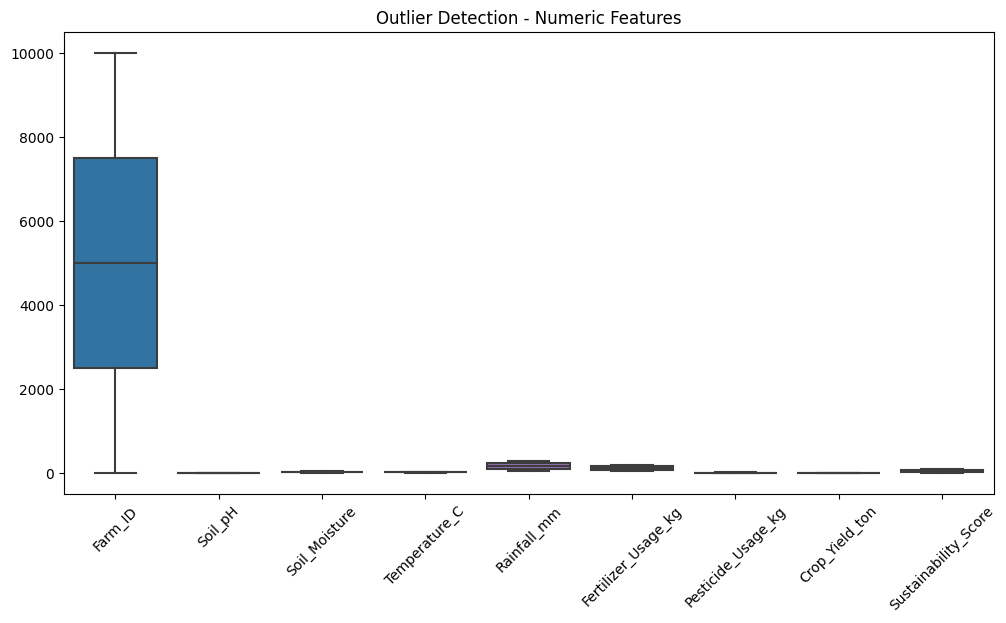

In [24]:
# Add this after the basic visualizations
print("\n🔎 Outlier Detection - Farmer Data")
plt.figure(figsize=(12, 6))
sns.boxplot(data=farmer_df.select_dtypes(include=np.number))
plt.title('Outlier Detection - Numeric Features')
plt.xticks(rotation=45)
plt.show()


📊 Detailed Feature Correlations


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

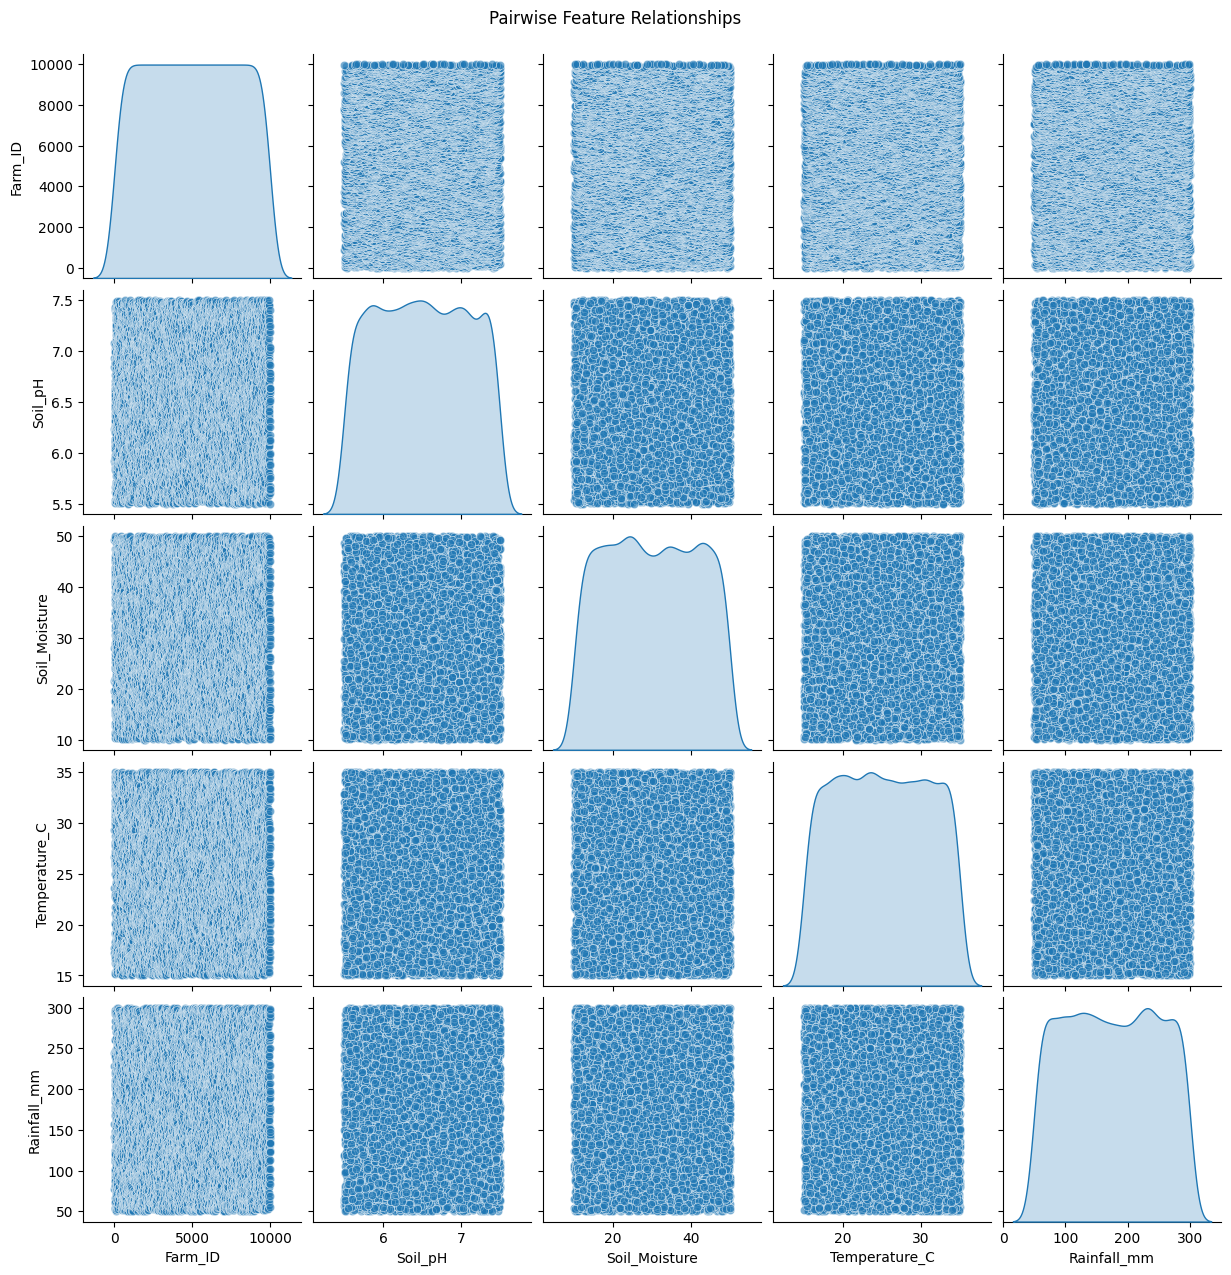

In [25]:
# More detailed correlation analysis than the basic heatmap
print("\n📊 Detailed Feature Correlations")
sns.pairplot(farmer_df.select_dtypes(include=np.number).iloc[:, :5],  # First 5 numeric cols
             diag_kind='kde', 
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()